Author: [Gutelvam Rodrigues](https://www.linkedin.com/in/gutelvam-rodrigues-de-jesus-500b21122/)

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

In [2]:
#importing Dataframe
#this data came from kaggle repository. Source:https://www.kaggle.com/andrewmvd/data-scientist-jobs
df = pd.read_csv('DataScientist.csv' , index_col=False) 

## Questions

***What’s the company with the highest number of data science jobs? What's it's Size?***

***What’s the best city to find a data science job?***

***What the sector belongs most of the Data Science jobs?***

***What are the most popular jobs of big data?***


In [3]:
#First of all we need to drop unecessary columns for EDA 
df.drop(columns= ['Unnamed: 0','index'], inplace=True)

In [4]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Easy Apply'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3909 entries, 0 to 3908
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          3909 non-null   object 
 1   Salary Estimate    3909 non-null   object 
 2   Job Description    3909 non-null   object 
 3   Rating             3909 non-null   float64
 4   Company Name       3909 non-null   object 
 5   Location           3909 non-null   object 
 6   Headquarters       3909 non-null   object 
 7   Size               3909 non-null   object 
 8   Founded            3909 non-null   int64  
 9   Type of ownership  3909 non-null   object 
 10  Industry           3909 non-null   object 
 11  Sector             3909 non-null   object 
 12  Revenue            3909 non-null   object 
 13  Competitors        3909 non-null   object 
 14  Easy Apply         3909 non-null   object 
dtypes: float64(1), int64(1), object(13)
memory usage: 458.2+ KB


***Formating and create new columns from Salary Estimate and Size***

- it's necessary because they are object type and has many text in cells, so it can not be treated as numeric variable yet

## Functions

In [6]:
def standardize_job_title(df):
    '''Function to fix and standartize Data Scientist Job Title'''
    df.loc[df['Job Title'].str.contains('Data Science', case=False), 'Job Title'] = 'Data Scientist'
    df.loc[df['Job Title'].str.contains('Data Analyst', case=False), 'Job Title'] = 'Data Analyst'
    df.loc[df['Job Title'].str.contains('Data Analytics', case=False), 'Job Title'] = 'Data Analyst'    
    df.loc[df['Job Title'].str.contains('Data Scientist', case=False), 'Job Title'] = 'Data Scientist'
    df.loc[df['Job Title'].str.contains('Machine Learning', case=False), 'Job Title'] = 'Data Scientist'
    df.loc[df['Job Title'].str.contains('Data Engineer', case=False), 'Job Title'] = 'Data Engineer'

In [7]:
def top_values(df,column ,top_quantity):
    '''Function to find top companies names
        input
         - df as dataframe containing the columns job title
         - top_quantity how many of top values to return (int)
         - column is the column name (string)
        output
         - List of top jobs
    '''
    return list(df[column].value_counts().index[0:top_quantity])

In [8]:
#finding top companies to offer Data Scienctist jobs
#list(df_popular_jobs[df_popular_jobs['Job Title'] == 'Data Scientist'].Company_name_clean.value_counts().index)

def top_companies_byjob(df,job_title, top_quantity):
    '''Function to find top companies names
        input
         - df as dataframe containing the columns job title and Company_name_clean 
         - job_title name of job to search (string)
         - top_quantity how many of top values to return (int)
        output
         - List of company names
    '''
    return list(df[df['Job Title'] == job_title].Company_name_clean.value_counts().index)[0:top_quantity]

In [9]:
def split_column_decimals(dataset, column_target, delimeter, output_1, output_2):
    '''This function intend to split data based on a delimiter and expand in two columns, 
       handling only decimals.
       Input:
           dataset = Dataframe to apply the function (DataFrame)
           column_target = Column name in dataset to apply split  (String)
           delimiter = delimiter of string to be splited like / - ; ,  (String)
           output_1 = Name of now column to hold left value (String)
           output_2 = Name of now column to hold right value (String)
       Output:
           dataset with column_target removed  and two new columns output_1 and output_2.
    '''
    df_temp = df[column_target].str.split(delimeter, n=1, expand=True)
    df_temp.rename(columns={0: output_1, 1: output_2}, inplace = True)
    dataset[output_1] = df_temp[output_1].str.extract(r'(\d+)')
    dataset[output_2] = df_temp[output_2].str.extract(r'(\d+)')
    dataset[output_1] = dataset[output_1].str.strip()
    dataset[output_2] = dataset[output_2].str.strip()
    dataset.drop(columns=[column_target], inplace=True)

In [10]:
def bar_plot_sns(pandas_series, title):   
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    sns.barplot(pandas_series.index, pandas_series.values)
    plt.title(title)
    plt.xticks(rotation=90)
    plt.show()    

In [11]:
#applying function to split on Salary estimate and Size columns
split_column_decimals(df, 'Salary Estimate','-','min_Salary','max_Salary')

In [12]:
df['Size'].value_counts()

10000+ employees           993
51 to 200 employees        563
1001 to 5000 employees     553
1 to 50 employees          550
201 to 500 employees       418
501 to 1000 employees      307
-1                         229
5001 to 10000 employees    219
Unknown                     77
Name: Size, dtype: int64

In [13]:
#Changing all NaN values from Type of ownership column to median, since it's a categorical variable
df['Type of ownership'] = df['Type of ownership'].astype('bool')
df['Type of ownership'].fillna(df['Type of ownership'].median(), inplace = True)

In [14]:
#Create new columns with company Size and Revenue as categories
le = preprocessing.LabelEncoder()
le.fit(df['Size'])
df['Size_category'] = le.transform(df['Size'])

le = preprocessing.LabelEncoder()
le.fit(df['Revenue'])
df['Revenue_category'] = le.transform(df['Revenue'])


le = preprocessing.LabelEncoder()
le.fit(df['Location'])
df['Location_category'] = le.transform(df['Location'])

In [15]:
# Changing all -1 value to NaN
import warnings
warnings.filterwarnings('ignore')

for x in df.columns:
    df[x] =np.where((df[x] == '-1')|(df[x] == -1) ,np.nan,df[x])

# What are the most popular jobs of big data?

In [16]:
#looking the column job title, i decided to filter dataset based on those terms.
new_df = df[(df['Job Title'].str.contains('Data Engineer'))| 
            (df['Job Title'].str.contains('Data Science'))| 
            (df['Job Title'].str.contains('Data Analyst'))| 
            (df['Job Title'].str.contains('Data Scientist'))|
            (df['Job Title'].str.contains('Machine Learning'))|
            (df['Job Title'].str.contains('Data')) 
           ].copy()

In [17]:
standardize_job_title(new_df)

In [18]:
new_df['Job Title'].value_counts()

Data Scientist                         1291
Data Analyst                            760
Data Engineer                           719
Data Modeler                             17
Data Architect II                         6
                                       ... 
Computational Scientist-Secure Data       1
Data Integration Analyst                  1
Systems Analyst - Data Integration        1
Data Crawler Engineer                     1
Data Operations Engineer                  1
Name: Job Title, Length: 112, dtype: int64

In [19]:
jobs = top_values(new_df,'Job Title', 5)

ds_val = pd.Series(new_df[new_df['Job Title'].isin(jobs)]['Job Title'].value_counts()) #Provide a pandas series of the counts for each FormalEducation status
# The below should be a bar chart of the proportion of individuals in your ed_vals
# if it is set up correctly.

#ds_val.plot(kind="bar");
#plt.title("Jobs of Big Data");

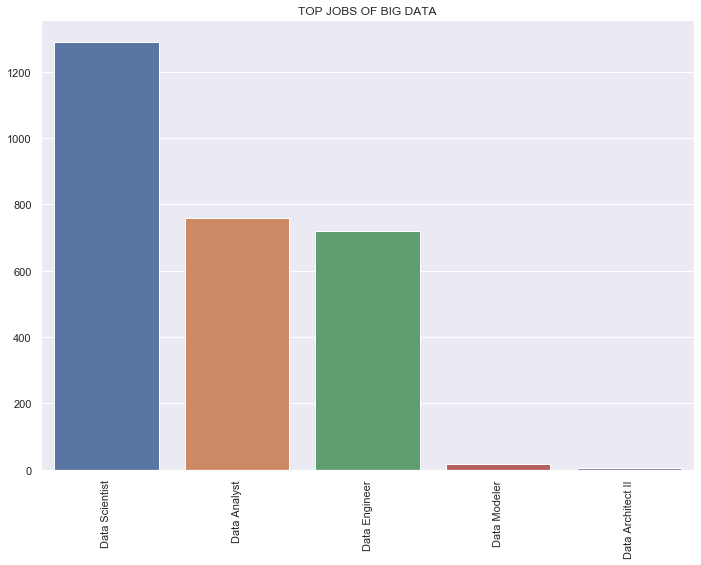

In [20]:
bar_plot_sns(ds_val,"TOP JOBS OF BIG DATA")

***Insight***

- The plot show us the top 5 most common jobs in big data 

#  What’s the company with the highest number of data science jobs? What's it's Size?

In [21]:
#slice of dataset for most popular jobs
df_popular_jobs = new_df[new_df['Job Title'].isin(jobs)].copy()

#ceating new column with clean company names 
df_popular_jobs['Company_name_clean'] = df['Company Name'].str.split('\r').str[0]

In [22]:
top_companies = top_companies_byjob(df_popular_jobs, 'Data Scientist', 22)


#filter in top 22 companies
comp_val = pd.Series(df_popular_jobs[(df_popular_jobs['Job Title'] == 'Data Scientist') & 
                    (df_popular_jobs['Company_name_clean'].isin(top_companies))]['Company_name_clean'].value_counts()) 

#comp_val.plot(kind="bar");
#plt.title("Companies with most of Data Science Jobs");

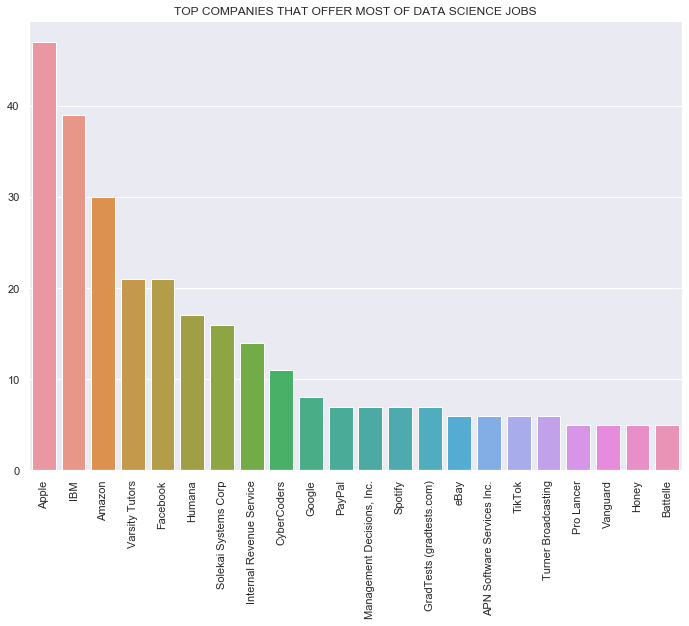

In [23]:
bar_plot_sns(comp_val, "TOP COMPANIES THAT OFFER MOST OF DATA SCIENCE JOBS")

In [24]:
df_pop_comp = df_popular_jobs[(df_popular_jobs['Job Title'] == 'Data Scientist') & 
                    (df_popular_jobs['Company_name_clean'].isin(top_companies))].copy()

df_pop_comp['Size'].value_counts()/df_pop_comp['Size'].shape[0]

10000+ employees          0.692568
201 to 500 employees      0.118243
1 to 50 employees         0.091216
1001 to 5000 employees    0.043919
51 to 200 employees       0.027027
Name: Size, dtype: float64

In [25]:
df_pop_comp[df_pop_comp['Size'].isin(['1 to 50 employees'])]['Company_name_clean'].unique()

array(['Solekai Systems Corp', 'Management Decisions, Inc.', 'Pro Lancer'],
      dtype=object)

***Insight***

- The plot shows the top 22 companies to offer Data Scientist Jobs
- 67 percente of those companies have more than 10000 employes, it's fine to think that bigger enterprise open more offer of job
- From small companies (small companies - 1 to 50 emplyess) there were three companies that is has spotlight  'Solekai Systems Corp', 'Varsity Tutors' and 'Pro Lancer'

# What sector belongs most of the Data Science jobs?

In [26]:
df_sector =df_popular_jobs[df_popular_jobs['Job Title'] == 'Data Scientist'].dropna(subset=['Sector'])

top_sectors = top_values(df_sector, 'Sector', 10)

In [27]:
#filter in top 10 sectors with most of Data Scientis Jobs
sectors = pd.Series(df_sector[df_sector['Sector'].isin(top_sectors)]['Sector'].value_counts()) 

#sectors.plot(kind="bar");
#plt.title("Sectors with most of Data Science Jobs");

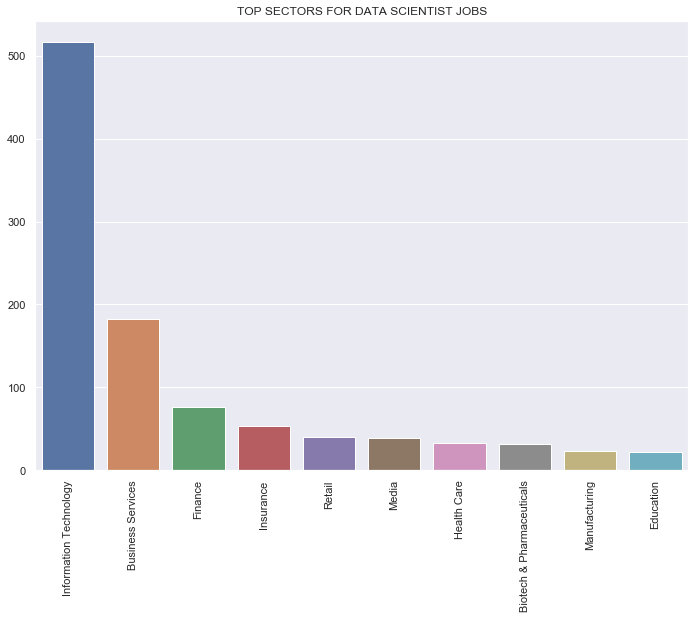

In [28]:
bar_plot_sns(sectors, "TOP SECTORS FOR DATA SCIENTIST JOBS")

***insight***

- As expected IT is the most common sector to employ Data Scientists
- It's realy nice to see Business Service, Finance and Retail growing in Data Science
- Since this dataframe doesn't have date we can not map trends

# What’s the best city to find a data science job?

In [29]:
df_location =df_popular_jobs[df_popular_jobs['Job Title'] == 'Data Scientist'].dropna(subset=['Location'])

top_location = top_values(df_sector, 'Location', 10)

In [30]:
#filter in top 10 locations with most of Data Scientis Jobs
location = pd.Series(df_location[df_location['Location'].isin(top_location)]['Location'].value_counts()) 

#location.plot(kind="bar");
#plt.title("Cities with most of Data Science Jobs");

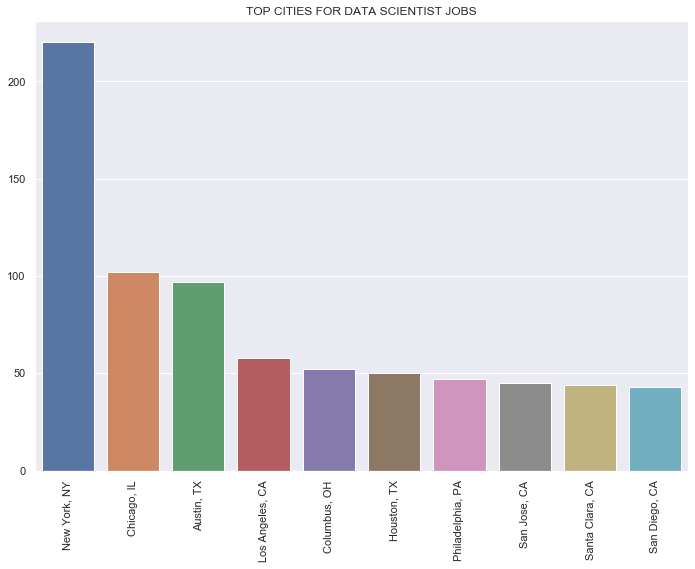

In [31]:
bar_plot_sns(location, "TOP CITIES FOR DATA SCIENTIST JOBS")

# Model to predict  minimal salary for most popular jobs of Big Data

***Looking and dealing with missing values***

- When making new columns of Salary and Company Size some NaN values was generated
- For this reason we need to handle them all

In [32]:
#percentage of missing values per column
#df_only_ds = new_df[new_df['Job Title'] == 'Data Scientist'].copy()
df_only_ds = new_df.copy()
df_only_ds.drop(columns=['Easy Apply','Competitors','Founded','Type of ownership'], inplace = True)
df_only_ds.dropna(subset=['min_Salary'], inplace = True)
df_only_ds.isna().mean()*100

Job Title             0.000000
Job Description       0.000000
Rating               10.558793
Company Name          0.000000
Location              0.000000
Headquarters          6.273569
Size                  5.965033
Industry             14.295509
Sector               14.295509
Revenue               5.965033
min_Salary            0.000000
max_Salary            0.000000
Size_category         0.000000
Revenue_category      0.000000
Location_category     0.000000
dtype: float64

In [33]:
df_only_ds.columns

Index(['Job Title', 'Job Description', 'Rating', 'Company Name', 'Location',
       'Headquarters', 'Size', 'Industry', 'Sector', 'Revenue', 'min_Salary',
       'max_Salary', 'Size_category', 'Revenue_category', 'Location_category'],
      dtype='object')

In [34]:
df_only_ds[['min_Salary', 'max_Salary']] = df_only_ds[['min_Salary', 'max_Salary']].astype('int64')

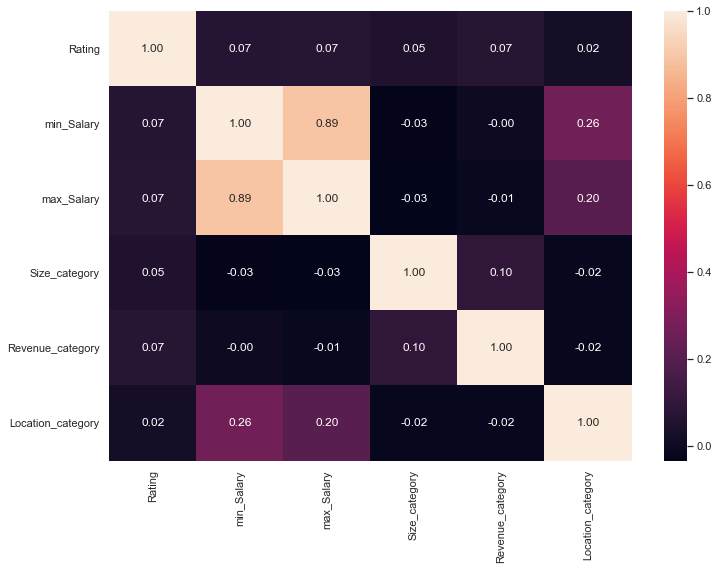

In [35]:
sns.heatmap(df_only_ds.corr(), annot=True, fmt=".2f")
plt.show()

In [36]:
df_only_ds['Rating'] = df_only_ds['Rating'].fillna(df_only_ds['Rating'].mode()[0])

In [37]:
X = df_only_ds[['Rating','max_Salary', 'Size_category', 'Revenue_category', 'Location_category']]
y = df_only_ds['min_Salary']

***Using Linear Regression***

In [38]:
#split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)


#Fiting model and Predicting 
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
prev_train = reg.predict(X_train)
prev_test  = reg.predict(X_test)

In [39]:
print (f"Train rmse:{mean_squared_error(prev_train,y_train)**(1/2)} R² Score: {r2_score(prev_train,y_train)}")

Train rmse:15.401070146889628 R² Score: 0.7575711740976517


In [41]:
print (f"Test rmse:{mean_squared_error(prev_test,y_test)**(1/2)} R² Score: {r2_score(prev_test,y_test)}")

Test rmse:15.88531946760895 R² Score: 0.747244666322352
